<h1><b>Time Series Analysis</b></h1>

Components of a Time-Series<br>

1. Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing (upward), decreasing (downward), or horizontal (stationary).
2. Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.   
3. Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
4. Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
5. ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.<br>
In this notebook, I conduct time series analysis of river flow data of the Grand River of Canada.

Reference: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing data**

In [38]:
pH = pd.read_csv("pH_noNA.csv")
pH

,Timestamp,Below Shand,Blair,Brant,Bridgeport,Glen Morris,Breslau Victoria,Road32,York,Hanlon
0,2018-01-01 00:00:00,7.960,8.225000,7.850000,8.370833,7.960864,7.826426,8.040000,6.890001,7.867140
1,2018-01-01 01:00:00,7.960,8.175000,7.850000,8.369167,7.905989,7.826490,8.044167,6.885834,7.856996
2,2018-01-01 02:00:00,7.960,8.135000,7.845833,8.360000,7.856115,7.826554,8.050000,6.880001,7.851851
3,2018-01-01 03:00:00,7.955,8.105000,7.835833,8.360000,7.811241,7.826618,8.042500,6.876668,7.846707
4,2018-01-01 04:00:00,7.950,8.080000,7.820000,8.367500,7.776367,7.826682,8.031667,6.885834,7.836563
...,...,...,...,...,...,...,...,...,...,...
43844,2023-01-01 19:00:00,8.315,7.730000,8.106250,7.566667,7.887500,8.047500,8.102500,7.910001,7.886667
43845,2023-01-01 20:00:00,8.315,7.739167,8.106250,7.560833,7.894167,8.047500,8.117500,7.910001,7.890000
43846,2023-01-01 21:00:00,8.315,7.742500,8.106250,7.564167,7.900000,8.047500,8.120000,7.910001,7.890000
43847,2023-01-01 22:00:00,8.315,7.750000,8.106250,7.577500,7.900000,8.047500,8.117500,7.910001,7.880833


In [39]:
pH.columns

Index(['Timestamp', 'Below Shand', 'Blair', 'Brant', 'Bridgeport',
       'Glen Morris', 'Breslau Victoria', 'Road32', 'York', 'Hanlon'],
      dtype='object')

In [40]:
len(pH)

43849

In [41]:
pH.dtypes

Timestamp            object
Below Shand         float64
Blair               float64
Brant               float64
Bridgeport          float64
Glen Morris         float64
Breslau Victoria    float64
Road32              float64
York                float64
Hanlon              float64
dtype: object

In [42]:
pH['Timestamp'] = pd.to_datetime(pH['Timestamp'])
pH.Timestamp.dtype

dtype('<M8[ns]')

In [43]:
pH.Timestamp.dtype

dtype('<M8[ns]')

In [44]:
pH.set_index("Timestamp", inplace=True)
pH

,Below Shand,Blair,Brant,Bridgeport,Glen Morris,Breslau Victoria,Road32,York,Hanlon
Timestamp,,,,,,,,,
2018-01-01 00:00:00,7.960,8.225000,7.850000,8.370833,7.960864,7.826426,8.040000,6.890001,7.867140
2018-01-01 01:00:00,7.960,8.175000,7.850000,8.369167,7.905989,7.826490,8.044167,6.885834,7.856996
2018-01-01 02:00:00,7.960,8.135000,7.845833,8.360000,7.856115,7.826554,8.050000,6.880001,7.851851
2018-01-01 03:00:00,7.955,8.105000,7.835833,8.360000,7.811241,7.826618,8.042500,6.876668,7.846707
2018-01-01 04:00:00,7.950,8.080000,7.820000,8.367500,7.776367,7.826682,8.031667,6.885834,7.836563
...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,8.315,7.730000,8.106250,7.566667,7.887500,8.047500,8.102500,7.910001,7.886667
2023-01-01 20:00:00,8.315,7.739167,8.106250,7.560833,7.894167,8.047500,8.117500,7.910001,7.890000
2023-01-01 21:00:00,8.315,7.742500,8.106250,7.564167,7.900000,8.047500,8.120000,7.910001,7.890000


In [45]:
#Percentage of Missing values
l = len(pH)
for i in range(1, len(pH.columns)):
  m = pH.iloc[ : , i].isin([np.nan]).sum(axis= 0)
  p = 100*m/l
  print(pH.columns[i], "         ",p)

Blair           0.0
Brant           0.0
Bridgeport           0.0
Glen Morris           0.0
Breslau Victoria           0.0
Road32           0.0
York           0.0
Hanlon           0.0


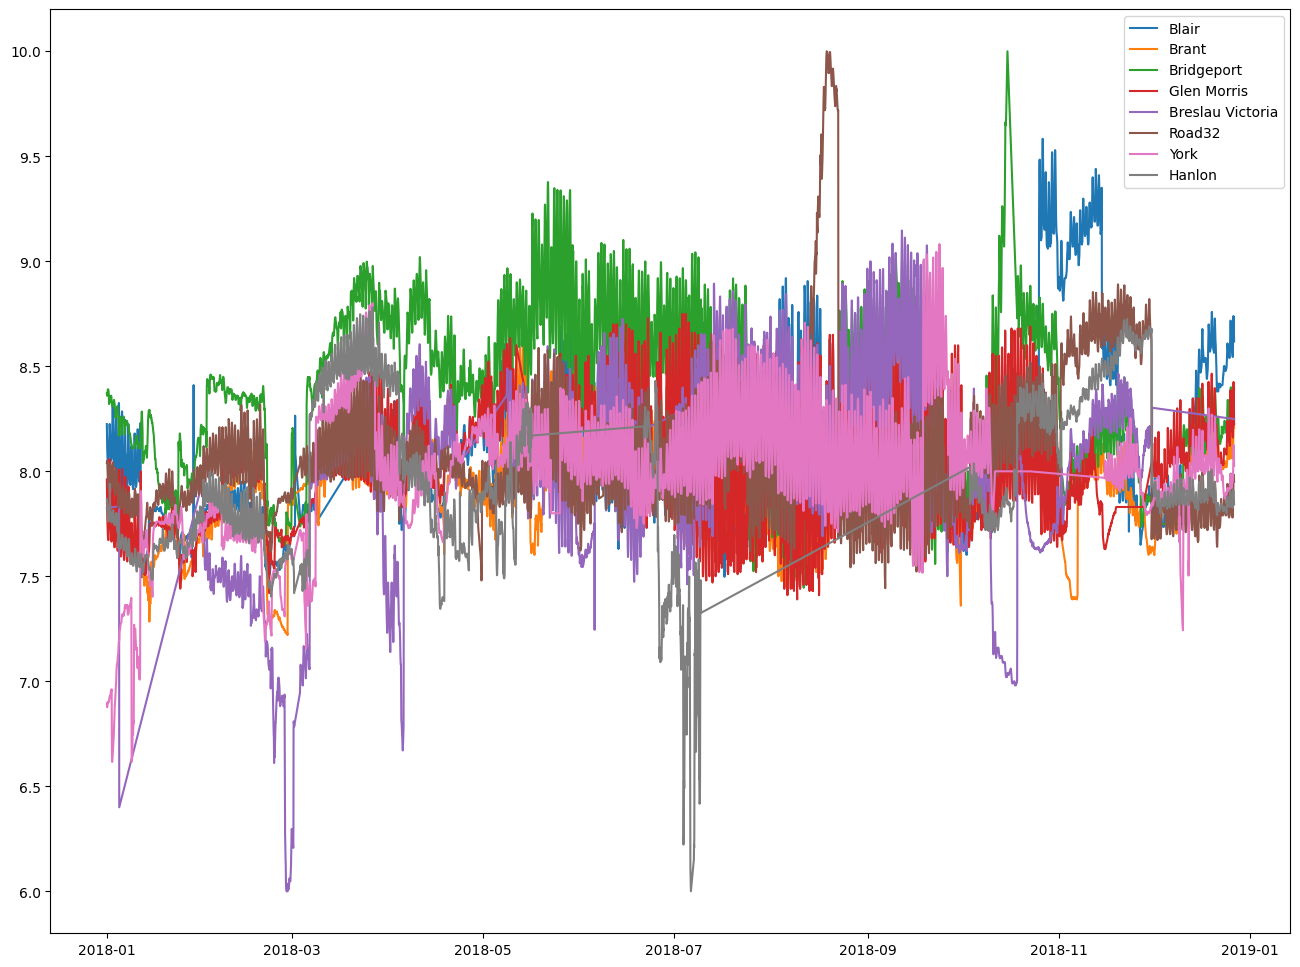

In [46]:
#Simple 2018 plot
plt.figure(figsize= (16,12))
for i in range(1, len(pH.columns)):
  plt.plot(pH.iloc[0:8640, i], label= pH.columns[i])
plt.legend()

# **Decomposition of Time Series**

In [48]:
#Decomposition of Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [49]:
#Daily decomposition for all the 17 locations in the dataset

for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 24)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 24)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [50]:
#Weekly decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 168)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 168)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [51]:
#Monthly decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 720)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 720)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [52]:
#Quarterly decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 2160)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 2160)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [53]:
#half-yearly decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 4320)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 4320)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [54]:
#yearly decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 8640)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 8640)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [55]:
#2.5 year decomposition for all the 14 locations in the dataset

#Decomposition of Time Series
for i in range(0, len(pH.columns)):
  #Multiplicative Decomposition
  multiplicative_decomposition = seasonal_decompose(pH.iloc[: , i], model= 'multiplicative', period= 21924)

  #Additive Decomposition
  additive_decomposition = seasonal_decompose(pH.iloc[: , i], model= "additive", period= 21924)

  plt.rcParams.update({"figure.figsize": (16, 12)})
  multiplicative_decomposition.plot().suptitle("Multiplicative Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  additive_decomposition.plot().suptitle("Additive Decomposition", fontsize= 16)
  plt.tight_layout(rect= [0, 0.03, 1, 0.95])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Tranformation to Stationary Time Series**

Reasons to convert to a stationary time series:

1. Forecasting a stationary series is relatively easy and the forecasts are more reliable.
2. An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
3. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.




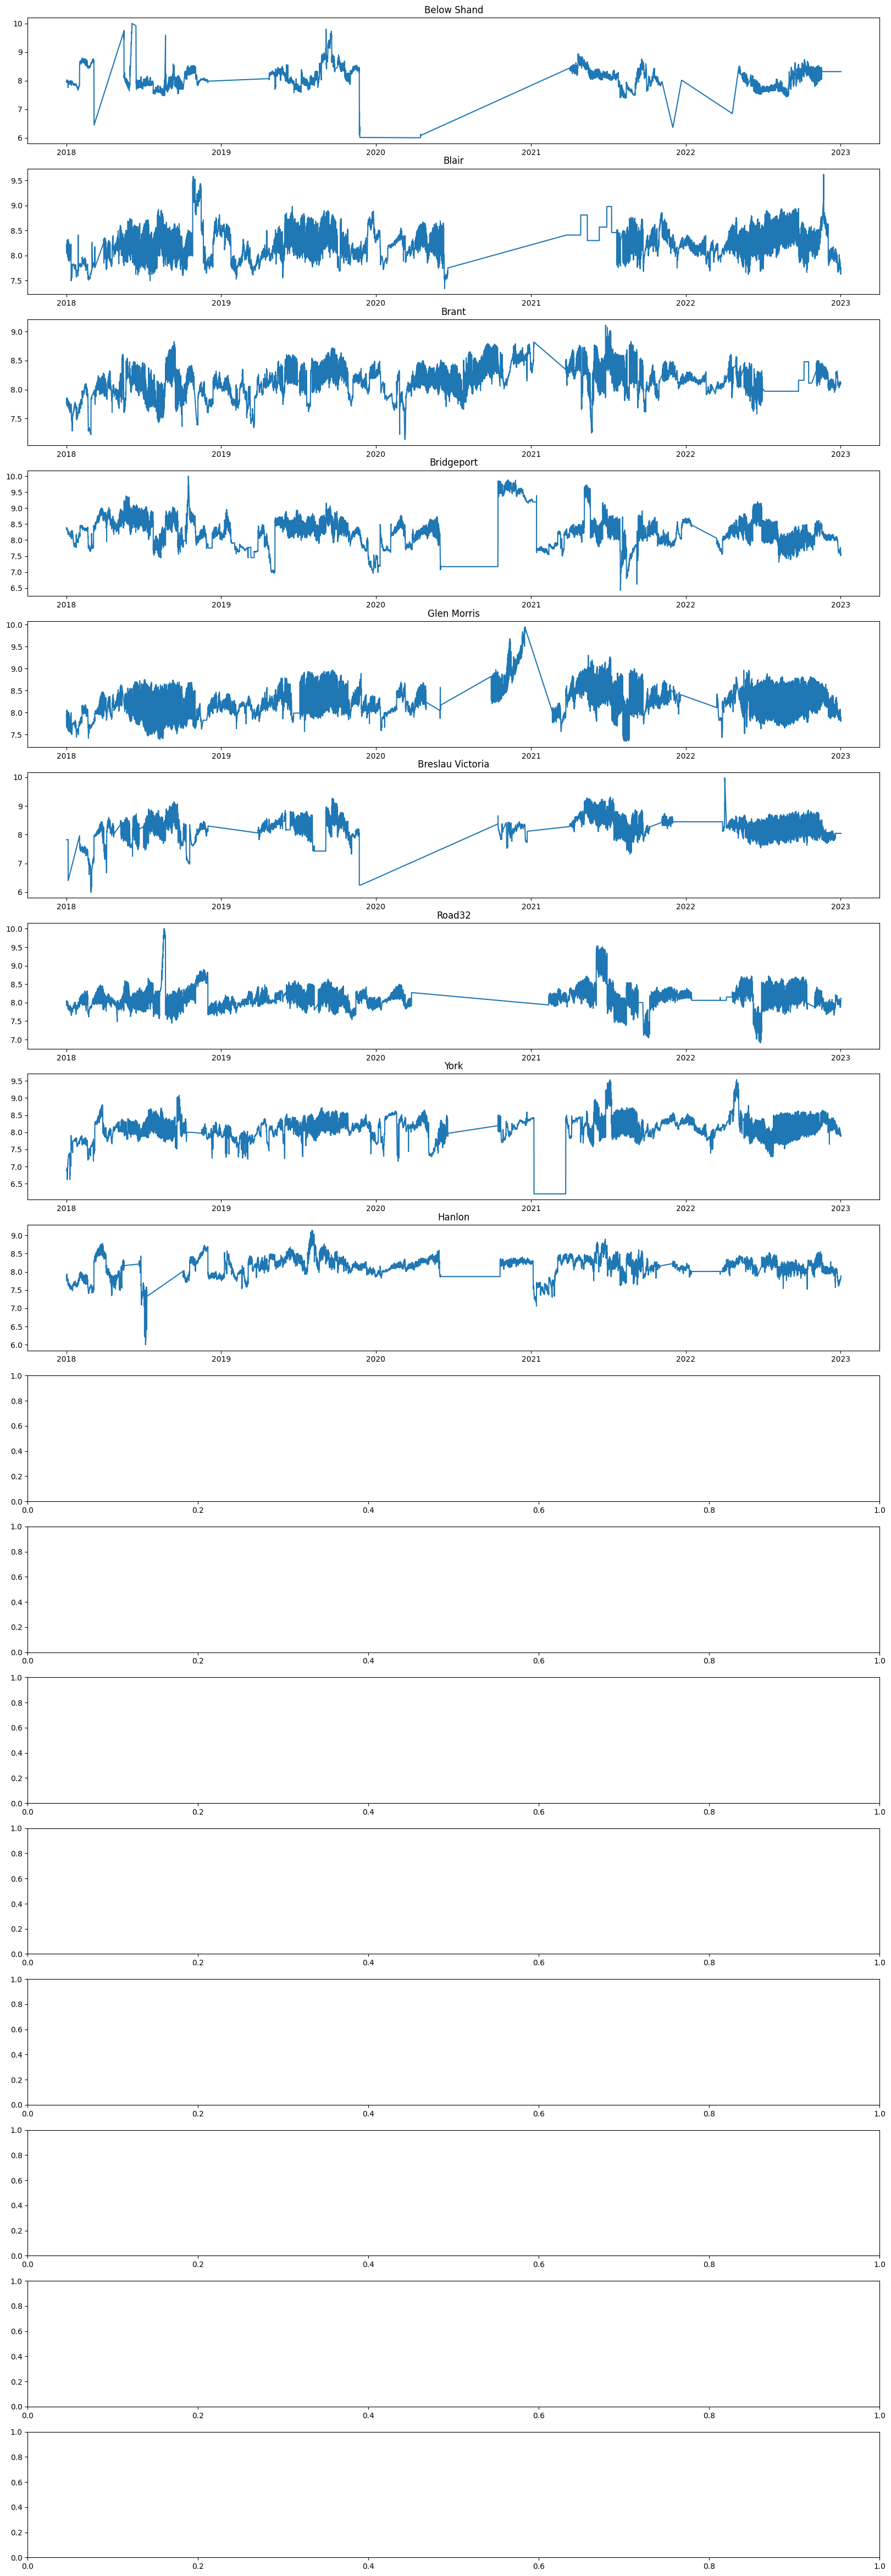

In [56]:
fig, ax = plt.subplots(17, 1, figsize= (20, 60))

for i in range(0, len(pH.columns)):
  ax[i].plot(pH.iloc[: , i])
  ax[i].set(title=pH.columns[i])

Firstly, we need to check for stationarity. We can do this by observing plots. There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called **Unit Root Tests**.

There are multiple implementations of Unit Root tests like:
1. Augmented Dickey Fuller test (ADF Test)
2. Kwiatkowski-Phillip-Schmidt-Shin-KPSS Test (trend stationary)
3. Philips Perron test (PP test)

## **Augmented Dicker Fuller Test**

We calculate the p-value. If p-value < 0.05, then the time series is stationary, else it is not stationary.

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
pH

,Below Shand,Blair,Brant,Bridgeport,Glen Morris,Breslau Victoria,Road32,York,Hanlon
Timestamp,,,,,,,,,
2018-01-01 00:00:00,7.960,8.225000,7.850000,8.370833,7.960864,7.826426,8.040000,6.890001,7.867140
2018-01-01 01:00:00,7.960,8.175000,7.850000,8.369167,7.905989,7.826490,8.044167,6.885834,7.856996
2018-01-01 02:00:00,7.960,8.135000,7.845833,8.360000,7.856115,7.826554,8.050000,6.880001,7.851851
2018-01-01 03:00:00,7.955,8.105000,7.835833,8.360000,7.811241,7.826618,8.042500,6.876668,7.846707
2018-01-01 04:00:00,7.950,8.080000,7.820000,8.367500,7.776367,7.826682,8.031667,6.885834,7.836563
...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,8.315,7.730000,8.106250,7.566667,7.887500,8.047500,8.102500,7.910001,7.886667
2023-01-01 20:00:00,8.315,7.739167,8.106250,7.560833,7.894167,8.047500,8.117500,7.910001,7.890000
2023-01-01 21:00:00,8.315,7.742500,8.106250,7.564167,7.900000,8.047500,8.120000,7.910001,7.890000


In [59]:
is_stationary = []
p_value = []
for i in range(0, len(pH.columns)):
  results = adfuller(pH.iloc[:, i].values, autolag= "AIC")
  print("For the location: ", pH.columns[i])
  print("Test-statistics: ", results[0])
  print("p-value: ", results[1])
  print("Critical Statistics: ", results[4])
  print("\n\n\n")
  p_value.append(results[1])
  is_stationary.append(1 if (results[1] < 0.05) else 0)

For the location:  Below Shand
Test-statistics:  -3.825533845714207
p-value:  0.002656612234152024
Critical Statistics:  {'1%': -3.430499331704717, '5%': -2.8616060013404656, '10%': -2.566805130366558}




For the location:  Blair
Test-statistics:  -7.510851012577246
p-value:  4.019369280408083e-11
Critical Statistics:  {'1%': -3.430499321474984, '5%': -2.8616059968192618, '10%': -2.5668051279600483}




For the location:  Brant
Test-statistics:  -8.044944802531898
p-value:  1.8050470715159379e-12
Critical Statistics:  {'1%': -3.430499321474984, '5%': -2.8616059968192618, '10%': -2.5668051279600483}




For the location:  Bridgeport
Test-statistics:  -5.6086104904135246
p-value:  1.2179657625123835e-06
Critical Statistics:  {'1%': -3.430499331704717, '5%': -2.8616060013404656, '10%': -2.566805130366558}




For the location:  Glen Morris
Test-statistics:  -5.431529055252696
p-value:  2.9072262807516273e-06
Critical Statistics:  {'1%': -3.430499318065385, '5%': -2.861605995312331, '10%'

In [60]:
p_value

[0.002656612234152024,
 4.019369280408083e-11,
 1.8050470715159379e-12,
 1.2179657625123835e-06,
 2.9072262807516273e-06,
 3.998086614432359e-05,
 4.6748981606542885e-14,
 1.6138672365274092e-08,
 1.68671132614386e-08]

In [61]:
is_stationary

[1, 1, 1, 1, 1, 1, 1, 1, 1]

Using the Augmented Dicker Fuller Test (ADF test), we can see that all the locations have stationary time series.

## **Kwiatkowski-Phillips-Schmidt-Shin Test**

This is used to test for trend stationary. In the statistical analysis of time series, a trend-stationary process is a stochastic process from which an underlying trend (function solely of time) can be removed, leaving just a stationary process.

The null hypothesis and the p-value is just the opposite of the ADF test. if p-value > 0.05, then the time series is stationary

In [62]:
from statsmodels.tsa.stattools import kpss

In [63]:
pH

,Below Shand,Blair,Brant,Bridgeport,Glen Morris,Breslau Victoria,Road32,York,Hanlon
Timestamp,,,,,,,,,
2018-01-01 00:00:00,7.960,8.225000,7.850000,8.370833,7.960864,7.826426,8.040000,6.890001,7.867140
2018-01-01 01:00:00,7.960,8.175000,7.850000,8.369167,7.905989,7.826490,8.044167,6.885834,7.856996
2018-01-01 02:00:00,7.960,8.135000,7.845833,8.360000,7.856115,7.826554,8.050000,6.880001,7.851851
2018-01-01 03:00:00,7.955,8.105000,7.835833,8.360000,7.811241,7.826618,8.042500,6.876668,7.846707
2018-01-01 04:00:00,7.950,8.080000,7.820000,8.367500,7.776367,7.826682,8.031667,6.885834,7.836563
...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,8.315,7.730000,8.106250,7.566667,7.887500,8.047500,8.102500,7.910001,7.886667
2023-01-01 20:00:00,8.315,7.739167,8.106250,7.560833,7.894167,8.047500,8.117500,7.910001,7.890000
2023-01-01 21:00:00,8.315,7.742500,8.106250,7.564167,7.900000,8.047500,8.120000,7.910001,7.890000


In [64]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(pH.iloc[:, 0].values, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [65]:
for i in range(0, len(pH.columns)):
  kpss_test(pH.iloc[:, i])
  print("\n\n")

KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary



KPSS Statistic: 2.8662137957209937
p-value: 0.01
num lags: 121
Critial Values:
   10% : 0.347
   5% : 0.463
  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the 

This test tells that all the locations have stationary time series.

## **Phillips-Perron**

This tests that a variable has a unit root or not. The null hypothesis is that the unit root is present. If p-value > 0.05, then null hypothesis is true and the series is non-stationary.

In [66]:
!pip3 install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.5 MB/s eta 0:00:00


In [67]:
from arch.unitroot import PhillipsPerron

In [68]:
p_values = []
for i in range(0, len(pH.columns)):
  print("For ", pH.columns[i], ": ")
  pp = PhillipsPerron(pH.iloc[:, i].values)
  print(pp.summary().as_text())
  print("\n\n\n")
  p_values.append(pp.pvalue)

For  Below Shand : 
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.750
P-value                         0.003
Lags                               55
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.




For  Blair : 
     Phillips-Perron Test (Z-tau)    
Test Statistic                -14.565
P-value                         0.000
Lags                               55
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.




For  Brant : 
     Phillips-Perron Test (Z-tau)    
Test Statistic                -12.171
P-value                         0.000
Lags                               55
-------------------------------------

Trend: Constant

In [69]:
p_values

[0.0034678783362931467,
 4.733423015303533e-27,
 1.423789407421841e-22,
 1.340734638388676e-10,
 1.6129029689484774e-27,
 1.4329461169428219e-12,
 4.755970270141512e-27,
 5.596148452623143e-15,
 8.598070915013572e-13]

As the p-values for the time series of all the locations are less than 0.05, we can conclude that all these time series are weakly stationary.

## **Results of Unit Root Test**

Performed Augmented Dicker Fuller Test (ADF), Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS) and Phillips-Perron Test (PP).

ADF - Time Series of all the locations are stationary.

KPSS - Time Series of all the locations are stationary.

PP - Time Series of all the locations are weakly stationary.

There are many ways to comvert to a stationary time series. For example, taking log of the series, taking the nth root, combination of the two, and the most common method, differencing.

Differencing method:

If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.
If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.

# **Detrend of Time Series**

Detrending a time series means to remove the trend component from the time series. There are multiple approaches to do so.
1. Subtract the line (or curve) of best fit from the time series.
2. Subtract the trend component obtained from the time series decomposition.
3. Subtract the mean.
4. Apply a filter like **Baxter-King filter** or the **Hodrick-Prescott** Filter to remove the moving average trend lines or the cyclical component.

I have implemented the first two methods below.

## **Subtracting the line (or curve) of best fit**

Let's assume that the trend is linear. SO I will do a linear regression and then subtract that from our data set.

In [70]:
from scipy import signal

In [71]:
def detrending(ser, title):
  detrended = signal.detrend(ser)
  plt.figure(figsize= (20, 3))
  plt.plot(detrended, label= "Detrended")
  plt.plot(ser, label= "Original")
  plt.title(title, fontsize= 16)
  plt.show()

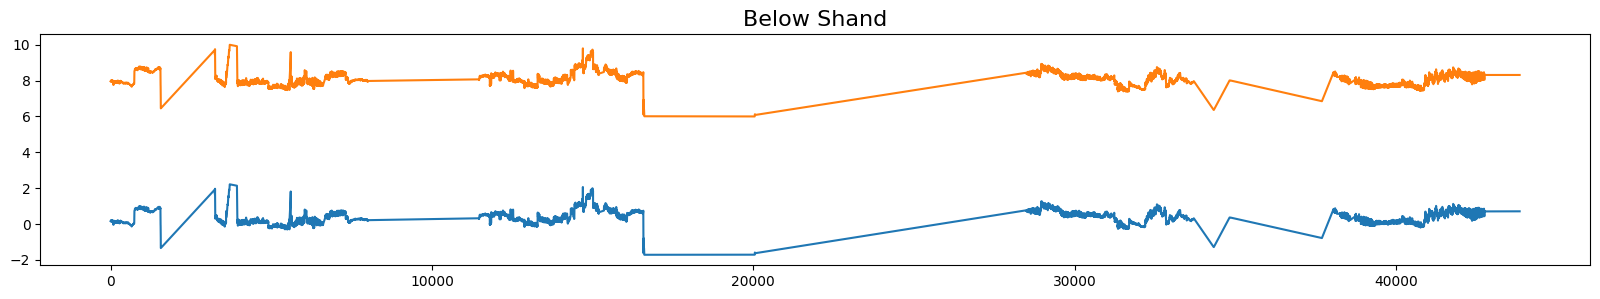

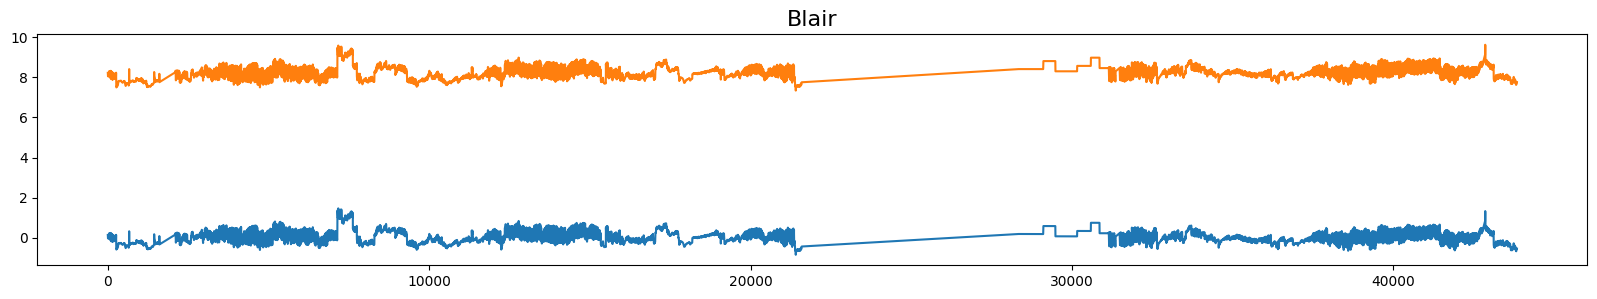

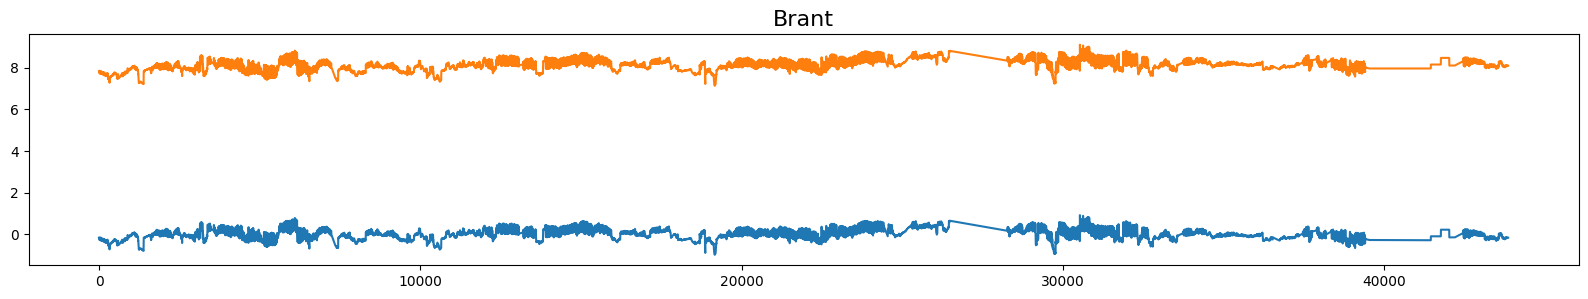

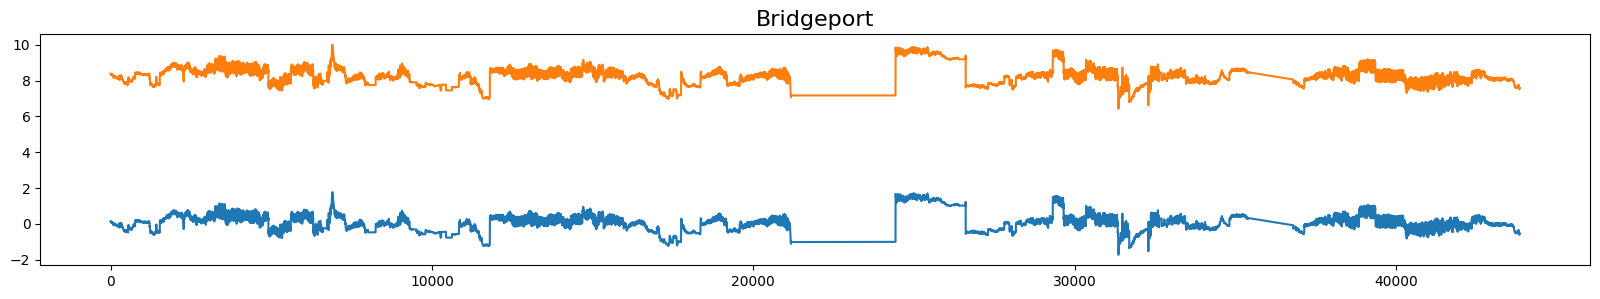

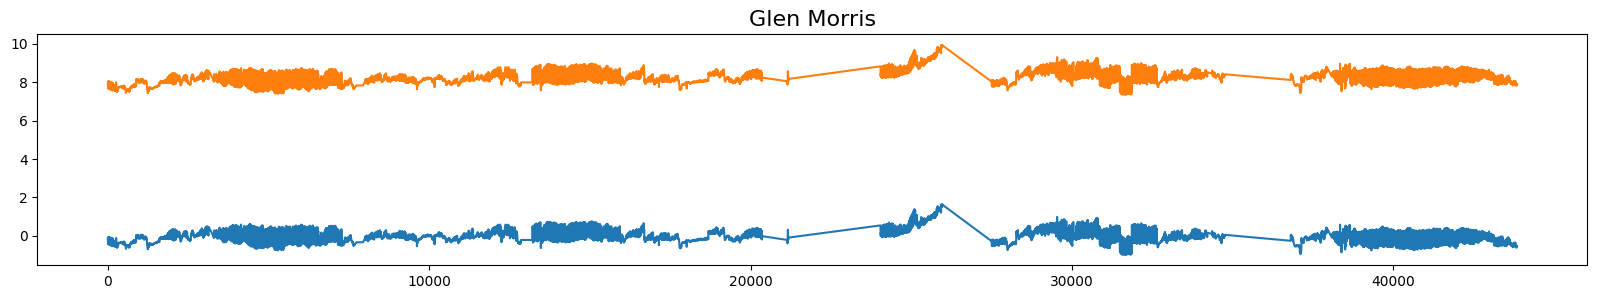

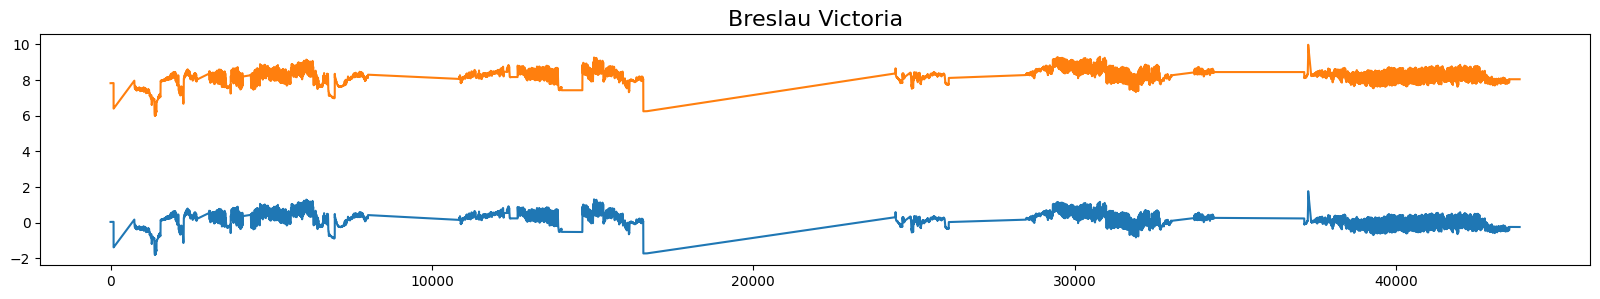

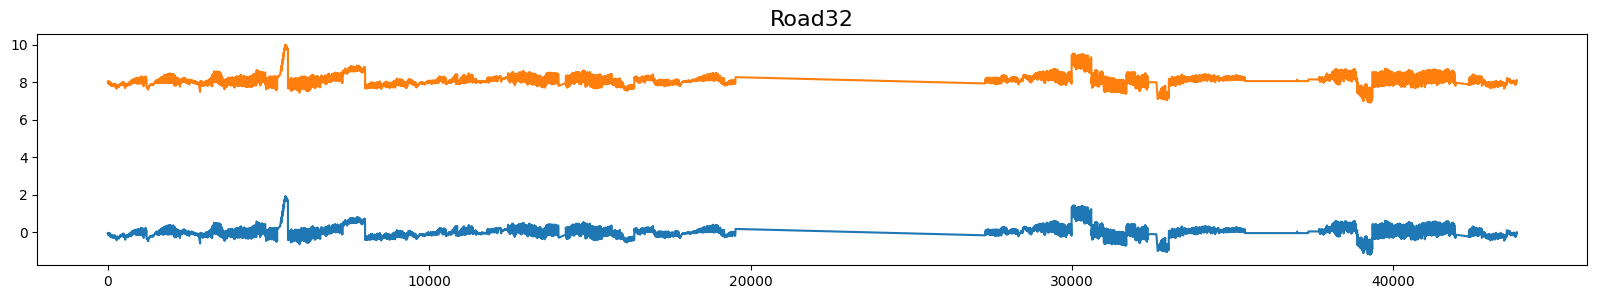

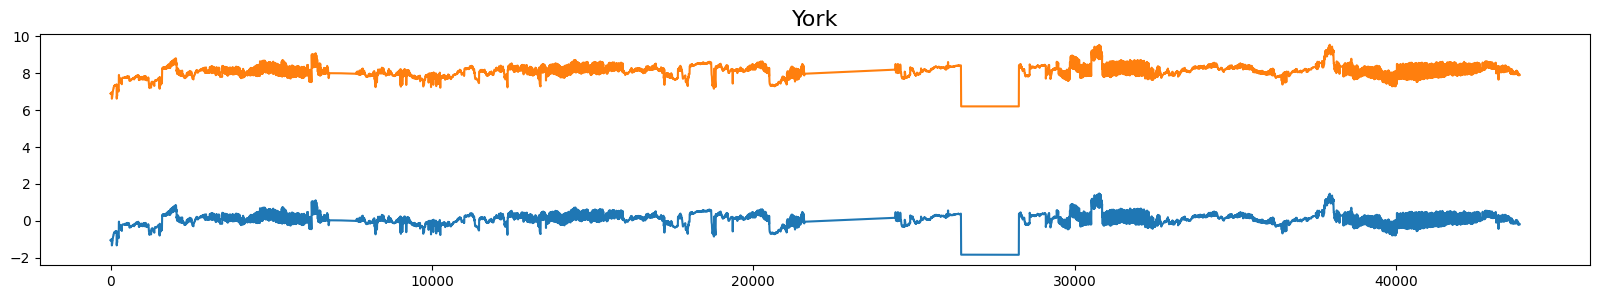

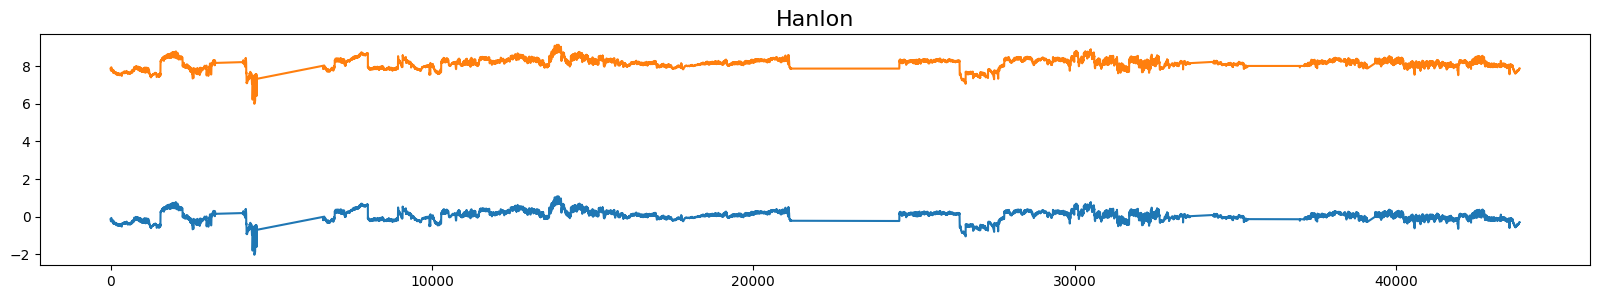

In [72]:
for i in range(0, len(pH.columns)):
  ser = pH.iloc[:, i].values
  detrending(ser, pH.columns[i])

It seems that there is no change after detrending a linear component. Let's try a polynomial component

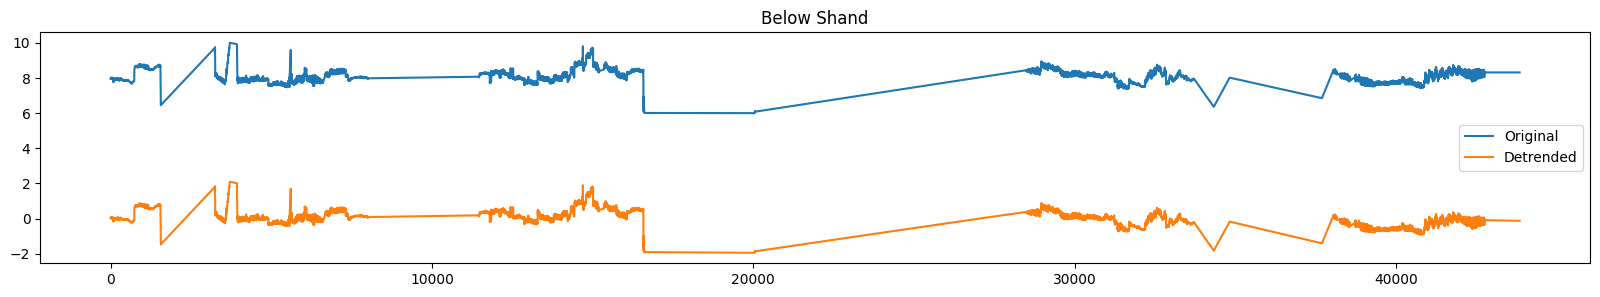

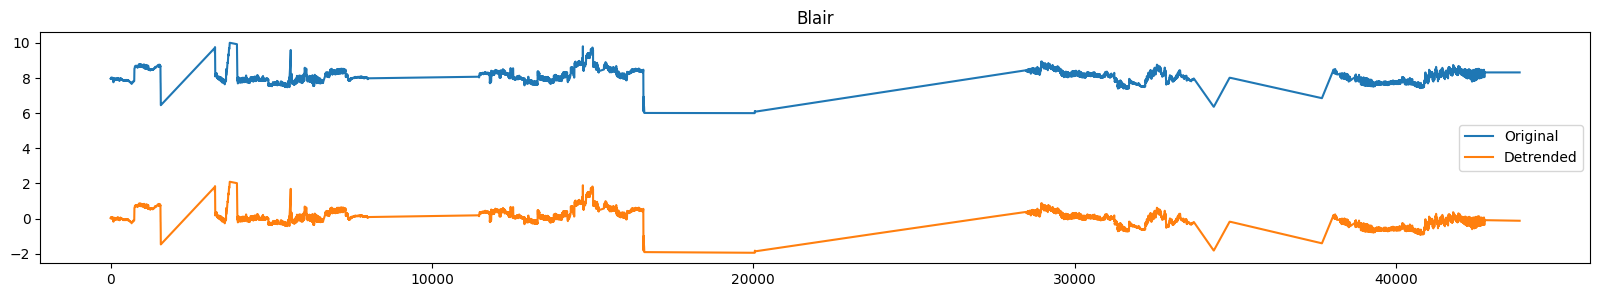

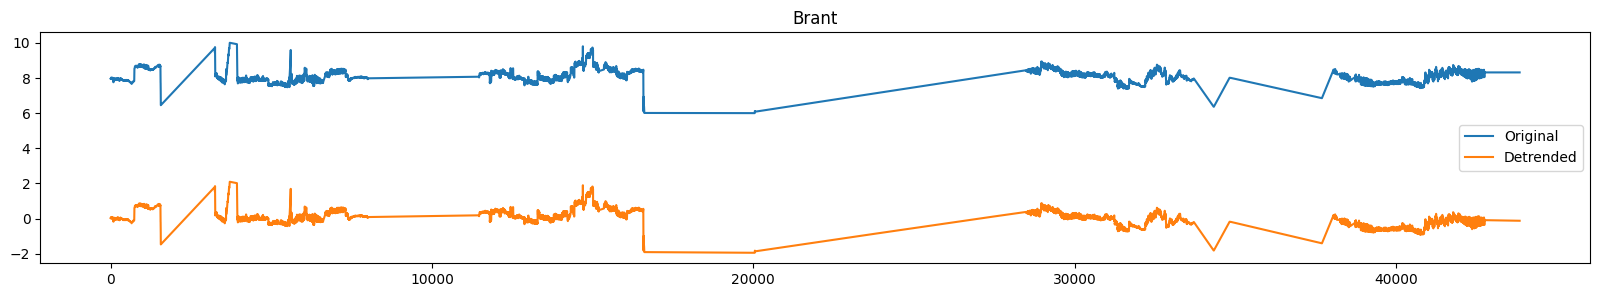

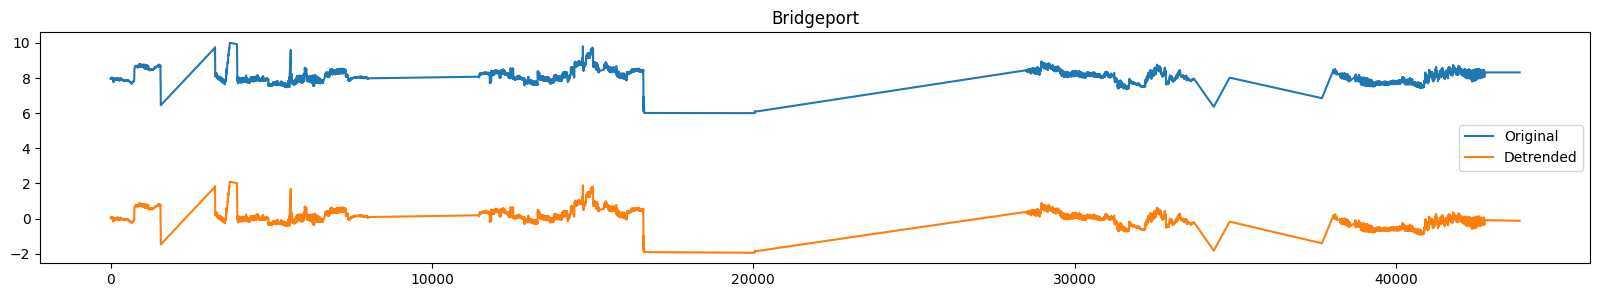

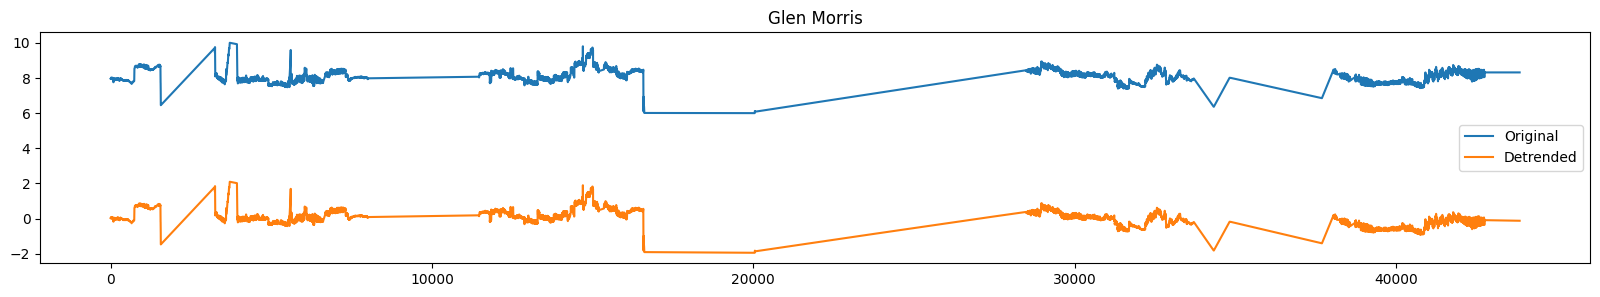

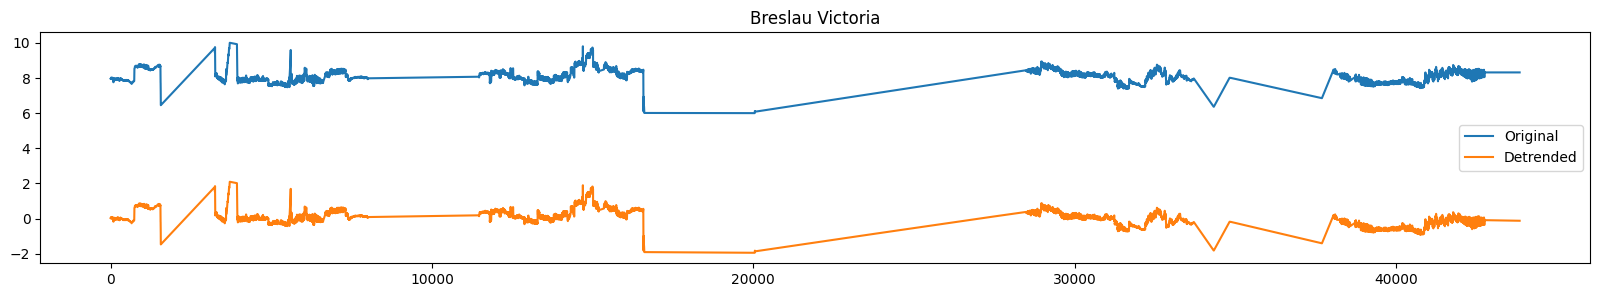

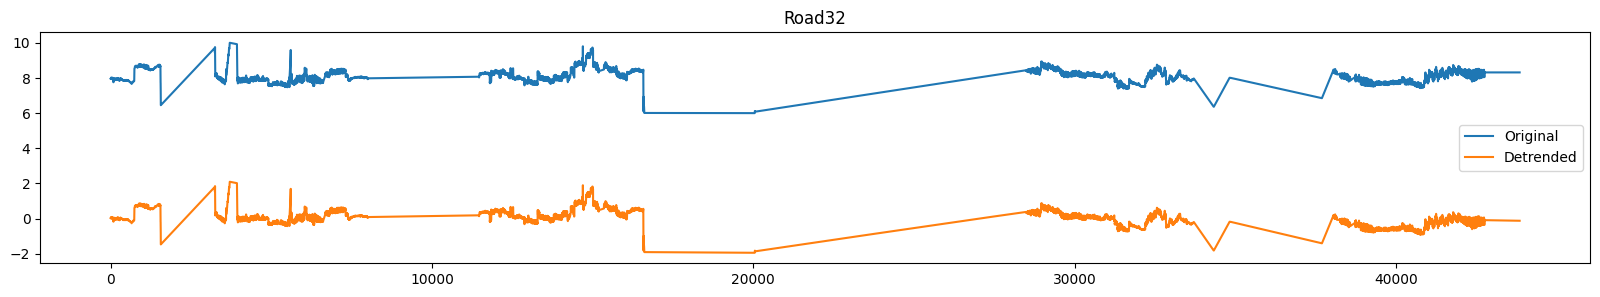

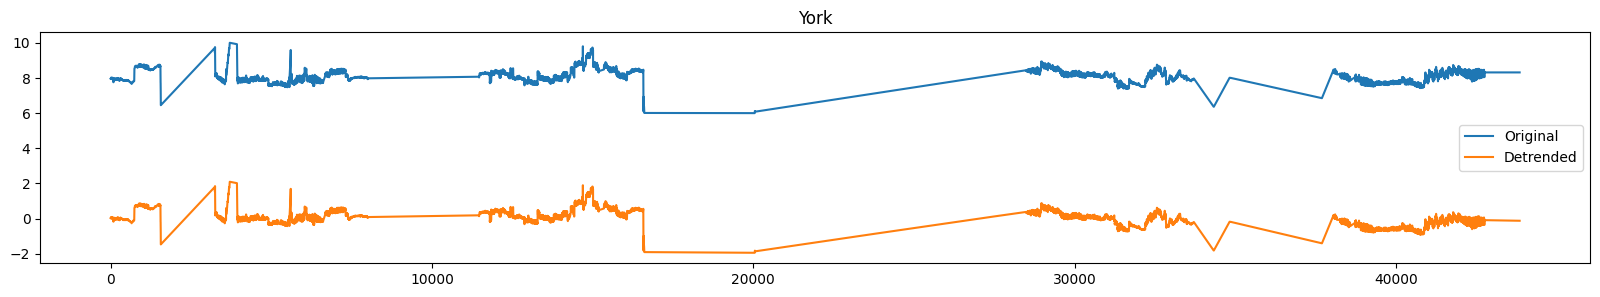

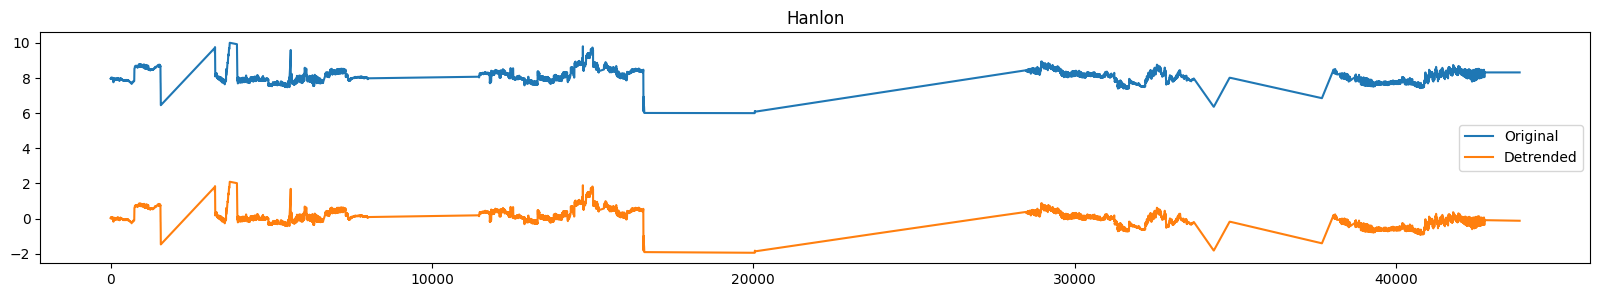

In [73]:
for i in range(0, len(pH.columns)):
  model = np.polyfit(np.arange(len(pH)), pH.iloc[:, 5], 2)
  predicted = np.polyval(model, np.arange(len(pH.index)))
  plt.figure(figsize=(20, 3))
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0], label= "Original")
  #plt.plot(np.arange(len(pH.index)), predicted, label= "trend")
  plt.title(pH.columns[i])
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0] - predicted)
  plt.legend(["Original", "Detrended"])
  plt.show()

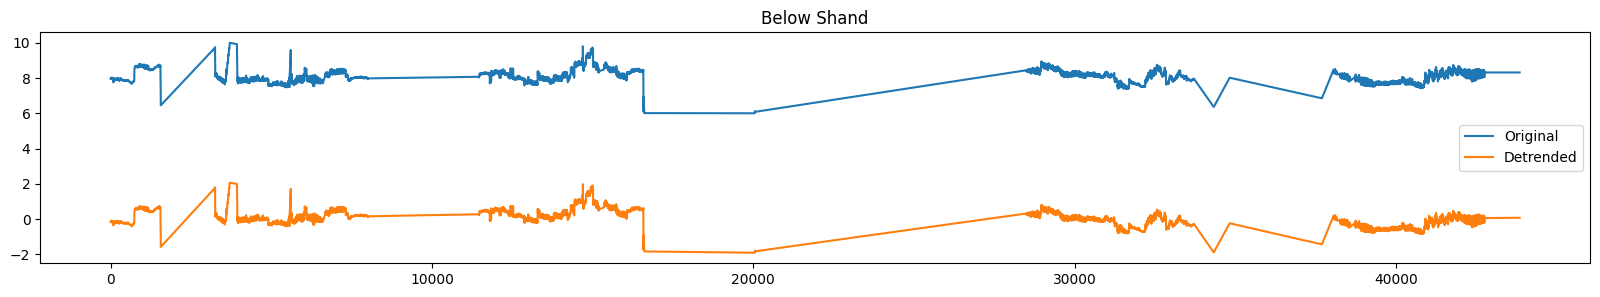

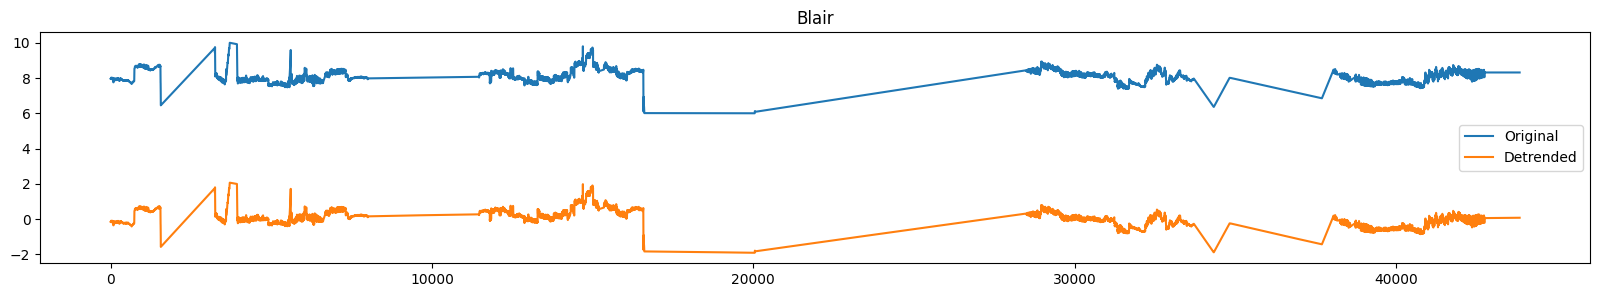

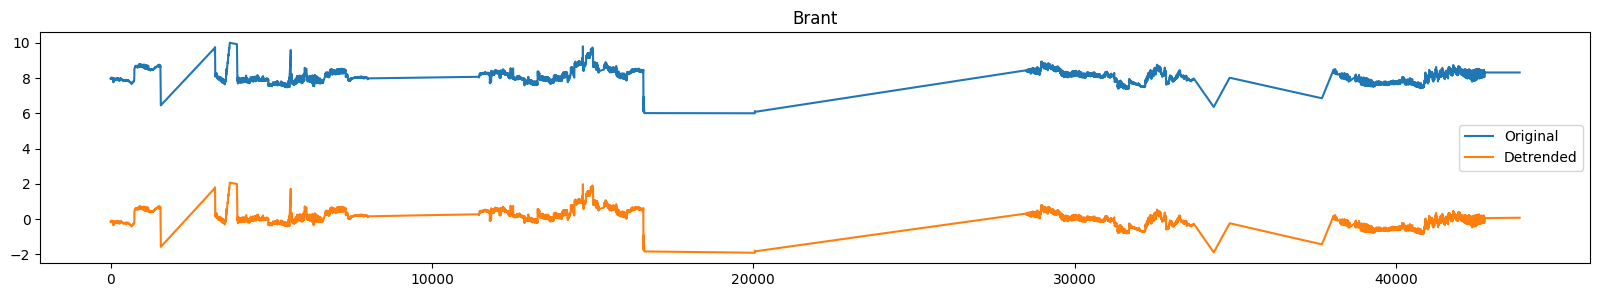

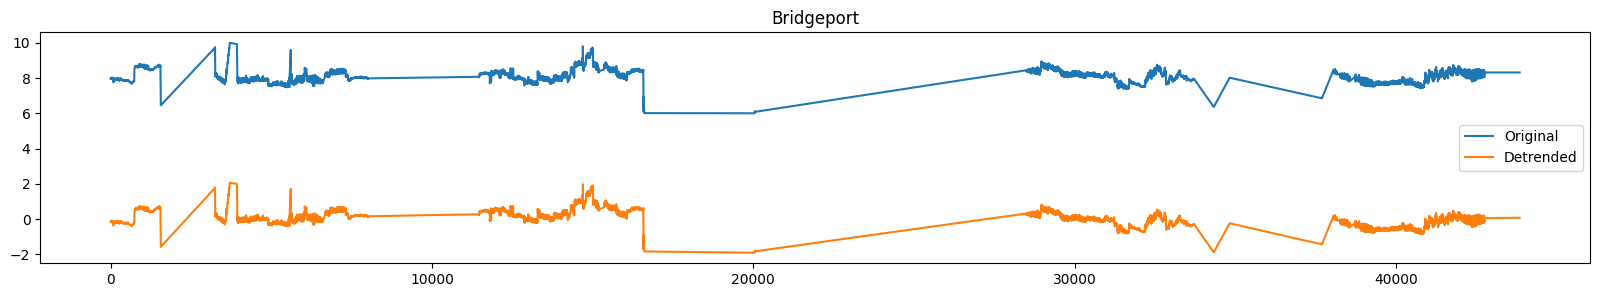

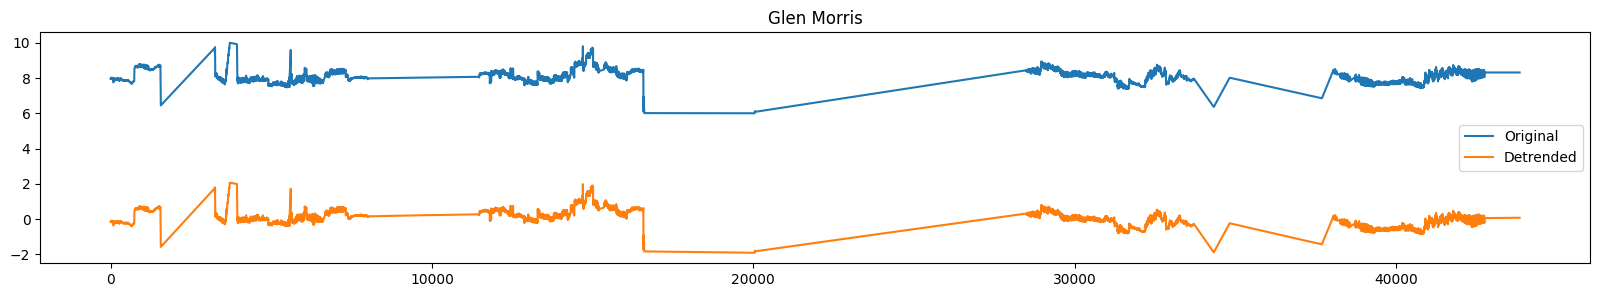

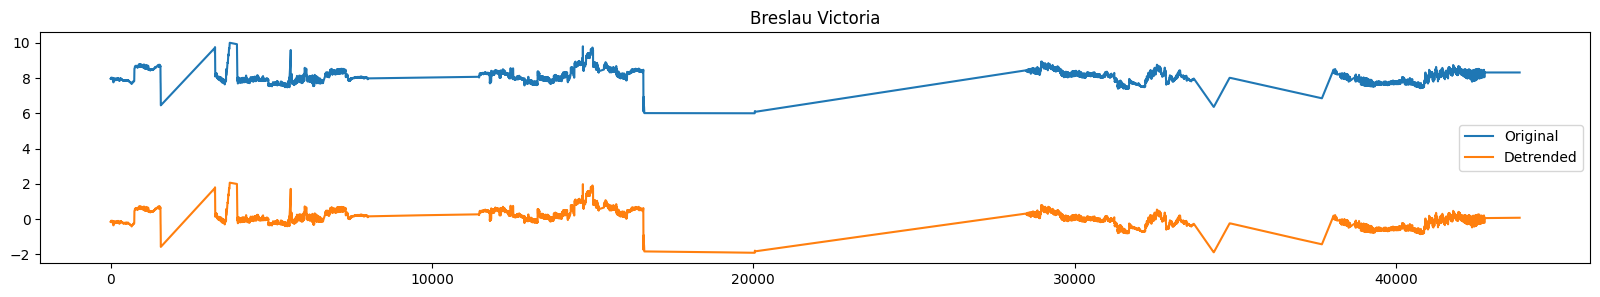

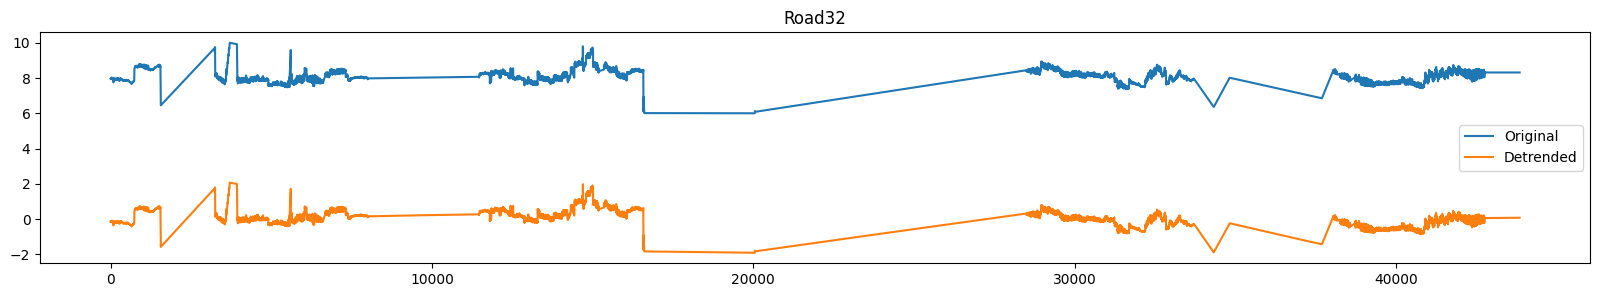

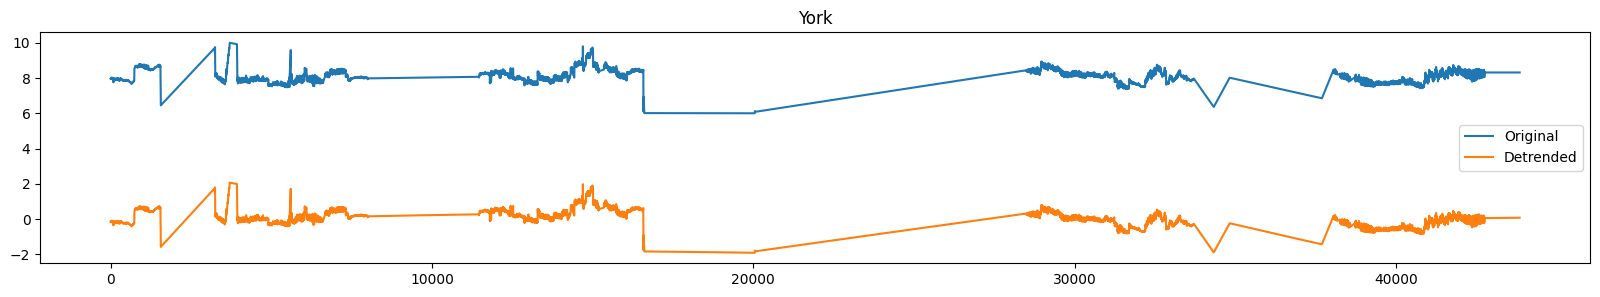

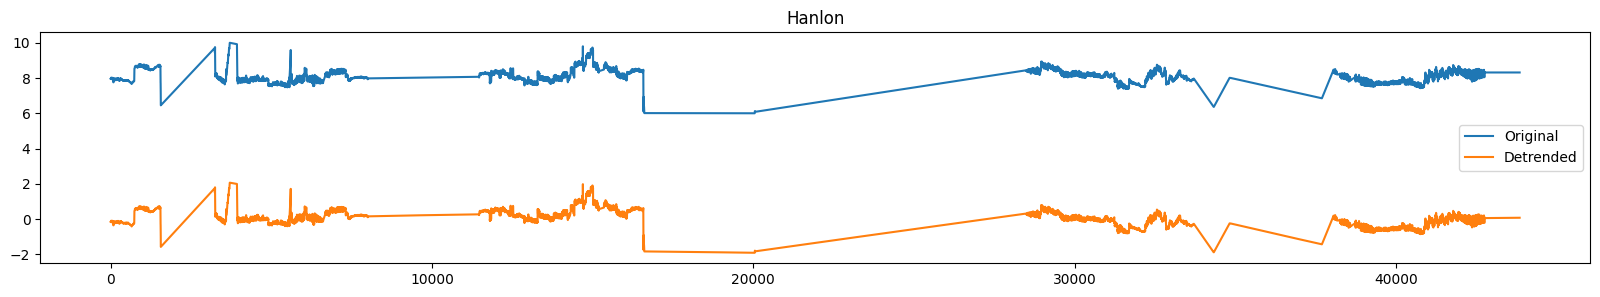

In [74]:
for i in range(0, len(pH.columns)):
  model = np.polyfit(np.arange(len(pH)), pH.iloc[:, 5], 3)
  predicted = np.polyval(model, np.arange(len(pH.index)))
  plt.figure(figsize=(20, 3))
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0], label= "Original")
  #plt.plot(np.arange(len(pH.index)), predicted, label= "trend")
  plt.title(pH.columns[i])
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0] - predicted)
  plt.legend(["Original", "Detrended"])
  plt.show()

ValueError: ignored

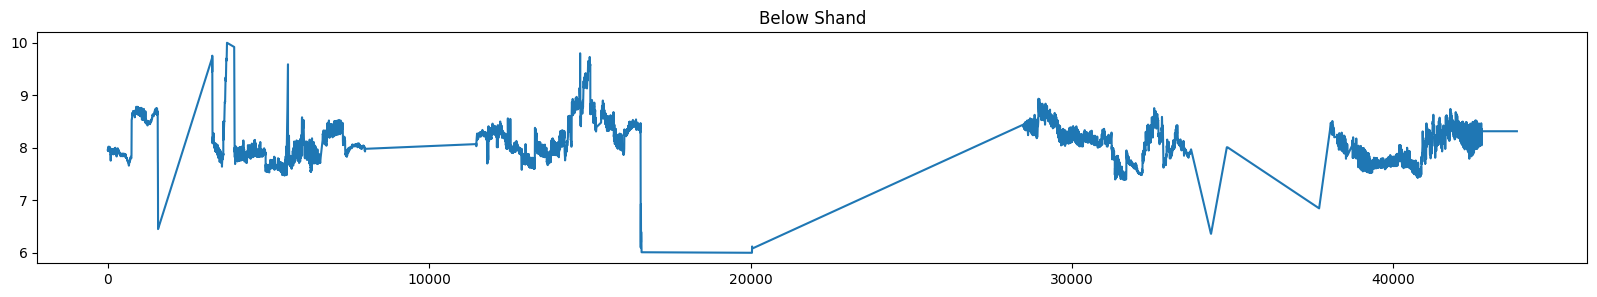

In [77]:
for i in range(0, len(pH.columns)):
  model = np.polyfit(np.arange(len(pH)), pH.iloc[:, 5], 4)
  predicted = np.polyval(model, np.arange(len(pH.index)))
  plt.figure(figsize=(20, 3))
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0], label= "Original")
  #plt.plot(np.arange(len(pH.index)), predicted, label= "trend")
  plt.title(pH.columns[i])
  plt.plot(np.arange(len(pH), pH.iloc[:, 0] - predicted))
  plt.legend(["Original", "Detrended"])
  plt.show()

In [ ]:
for i in range(0, len(pH.columns)):
  model = np.polyfit(np.arange(len(pH)), pH.iloc[:, 5], 11)
  predicted = np.polyval(model, np.arange(len(pH.index)))
  plt.figure(figsize=(20, 3))
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0], label= "Original")
  #plt.plot(np.arange(len(pH.index)), predicted, label= "trend")
  plt.title(pH.columns[i])
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0] - predicted)
  plt.legend(["Original", "Detrended"])
  plt.show()

In [ ]:
for i in range(0, len(pH.columns)):
  model = np.polyfit(np.arange(len(pH)), pH.iloc[:, 5], 21)
  predicted = np.polyval(model, np.arange(len(pH.index)))
  plt.figure(figsize=(20, 3))
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0], label= "Original")
  #plt.plot(np.arange(len(pH.index)), predicted, label= "trend")
  plt.title(pH.columns[i])
  plt.plot(np.arange(len(pH.index)), pH.iloc[:, 0] - predicted)
  plt.legend(["Original", "Detrended"])
  plt.show()

We can see that the polynomial trends are very weak and do not fit. It seems that there is no trend at all.

## **Subtracting the trend component**

Here, I will subtract the trend component from the seasonal_decompose

Subtracting daily trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=24)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting weekly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=168)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting Monthly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=720)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting Quarter yearly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=2160)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting half-yearly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=4320)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting yearly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=8640)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

Subtracting 2.5 yearly trend

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model='multiplicative', period=21924)
  detrended = pH.iloc[:, i].values - result_mul.trend
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(detrended)
  plt.title(pH.columns[i], fontsize=16)
  plt.legend(["Original", "Detrended"])
  plt.show()

We can see that after subtracting the trend component got from the function seasonal_decompose, the plot has not changed, it has just changed its position on y-axis, but the curvature remains the same. The best fit I think is the subtraction of weekly trend

# **Deseasonalizing the time series**

There are multiple appraches to deseasonalize a time series. These approaches are listed below:


1.   Taking a moving average with length as the seasonal window. This will smoothen the series in the process.
2.   Seasonal difference the series (subtract the value of previous season from the current value).
3.   Divide the series by the seasonal index obtained from STL decomposition.



If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

In [ ]:
pH

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 24)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 168)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 720)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 2160)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 4320)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 8640)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

In [ ]:
for i in range(0, len(pH.columns)):
  result_mul = seasonal_decompose(pH.iloc[:, i], model= "multiplicative", period= 21924)
  deseasonalized = pH.iloc[:, i].values / result_mul.seasonal
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i])
  plt.plot(deseasonalized)
  plt.legend(["Original", "Deseasonalized"])
  plt.title(pH.columns[i])

# **Testing for Seasonality**

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervales. So, the type of seasonality is determined by the clock or the calendar.
1. Hour of the day
2. Day of the month
3. Weekly
4. Monthly
5. Yearly

However, if we want a more definitive inspection of the seasonality, we can use the **Autocorrelation Function (ACF) plot**. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

In [ ]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(pH.iloc[:2160, 0].tolist())

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pH.iloc[:, 0].tolist(), lags=24, ax=axes[0])
plot_pacf(pH.iloc[:, 0].tolist(), lags=24, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pH.iloc[:, 0].tolist(), lags=168, ax=axes[0])
plot_pacf(pH.iloc[:, 0].tolist(), lags=168, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pH.iloc[:, 0].tolist(), lags=720, ax=axes[0])
plot_pacf(pH.iloc[:, 0].tolist(), lags=720, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pH.iloc[:, 0].tolist(), lags=2160, ax=axes[0])
plot_pacf(pH.iloc[:, 0].tolist(), lags=2160, ax=axes[1])

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(pH.iloc[:, 0].tolist(), lags=4320, ax=axes[0])
plot_pacf(pH.iloc[:, 0].tolist(), lags=4320, ax=axes[1])

# **Granger Causality Test**

This test is used to determine if one time series will be usefull to forecast another. It is based on the idea that if X causes Y, then the forecast to Y based on previous values of Y and the previous values of X should outperform the forecast of Y based on previous values of Y alone.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
from datetime import datetime

In [ ]:
pH_copy = pH.copy()
pH_copy["month"] = pd.DatetimeIndex(pH_copy.index).month

In [ ]:
pH_copy

In [ ]:
pH_copy[["York", "month"]]

In [ ]:
for i in range(0, len(pH.columns)):
  print("For : ", pH.columns[i])
  grangercausalitytests(pH_copy[[pH_copy.columns[i], "month"]], maxlag= 24)
  print("\n\n")

It can be seen that almost all the columns' pvalues are less than 0.05 for a lag of 3-4. This means that months granger causes the values of river-flow with a lag of 3-4 months behind.

# **Smoothening the Time Series**

This may be useful in the following circumstances.
1. Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
2. The smoothed version of series can be used as a feature to explain the original series itself.
3. visualize the underlying trend better.

We can smoothen a time series using the following methods:
1. Take a moving average
2. Do a LOESS smoothning (Localized Regression)
3. Do a LOWESS smoothning (Locally Weighted Regression)

## **Moving Average**

Moving Average is the average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration will effectively nullify the seasonal effect.

In [ ]:
roll = pH.rolling(window= 24)
roll_mean = roll.mean()

In [ ]:
roll_mean.head(24)

In [ ]:
for i in range(0, len(pH.columns)):
  plt.figure(figsize= (20, 4))
  plt.plot(pH.iloc[:, i], label= "Original")
  plt.plot(roll_mean.iloc[:, i], label= "Moving Average (24)")
  plt.title(pH.columns[i])
  plt.legend()
  plt.show()

## **LOESS Smoothning**

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [ ]:
pH.index.dtype

In [ ]:
for i in range(0, len(pH.columns)):
  pH_loess_5 = lowess(pH.iloc[:, i].values, np.arange(len(pH)), frac=0.05)
  pH_loess_15 = lowess(pH.iloc[:, i].values, np.arange(len(pH)), frac=0.15)
  plt.plot(pH.iloc[:, i])
  plt.plot(pH_loess_5[:, 1])
  plt.plot(pH_loess_15[:, 1])
  plt.legend(["Original", "5% LOESS", "15% LOESS"])
  plt.show()

It can be seen that the smoothning using LOESS is also not very effective.

# **Summation by year (after interpolation)**

In [ ]:
pH

In [ ]:
pH_2018 = pH[pH.index < '2019-01-01 00:00:00']
pH_2018

In [ ]:
pH_2019 = pH[(pH.index >= '2019-01-01 00:00:00') & (pH.index < '2020-01-01 00:00:00')]
pH_2019

In [ ]:
pH_2020 = pH[(pH.index >= '2020-01-01 00:00:00') & (pH.index < '2021-01-01 00:00:00')]
pH_2020

In [ ]:
pH_2021 = pH[(pH.index >= '2021-01-01 00:00:00') & (pH.index < '2022-01-01 00:00:00')]
pH_2021

In [ ]:
pH_2022 = pH[(pH.index >= '2022-01-01 00:00:00') & (pH.index < '2023-01-01 00:00:00')]
pH_2022

In [ ]:
pH_2018.sum()

In [ ]:
sum_pH = pd.DataFrame(pH.columns, columns=["Location"])
sum_pH

In [ ]:
sum_pH["2018"] = pH_2018.sum().values
sum_pH["2019"] = pH_2019.sum().values
sum_pH["2020"] = pH_2020.sum().values
sum_pH["2021"] = pH_2021.sum().values
sum_pH["2022"] = pH_2022.sum().values
sum_pH

In [ ]:
sum_pH.columns

In [ ]:
sum_pH.set_index("Location", inplace= True)

In [ ]:
sum_pH

In [ ]:
sum_pH = sum_pH*3600

In [ ]:
sum_pH = sum_pH/1000
sum_pH

This gives the annual flow for each locations in million litres/hour.

In [ ]:
sum_pH.to_csv("SummationRiverFlowAfterInterpolation.csv")

In [ ]:
from google.colab import files
down = files.download("SummationRiverFlowAfterInterpolation.csv")